### IMPORTING LIBRARIES

In [1]:
# Supress the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

### READING THE DATASET

In [3]:
# Read the dataset.
path=os.getcwd()
data=pd.read_csv(path+r'/train.csv')

### GENERAL CHECKS ON DATA

In [4]:
# Check the head of the dataset.
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check the shape of the dataset.
data.shape

(1460, 81)

In [6]:
# Info of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# Check the summary statistics of the dataframe.
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### DATA CLEANING

In [8]:
# Get the columns of the dataframe.
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
num_cols=data.select_dtypes(include=np.number).columns #filtering the numerical columns in the dataset

In [10]:
cat_cols=data.select_dtypes(['object']).columns #filtering the numerical columns in the dataset

In [11]:
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### CALUCULATING THE NULL VALUES

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Null values in the dataframe will effect the analysis and will not be helpful in securing the accurate results. So, we first count the percentage of Null values in each column of the dataframe and deleting the desired based on futher analyis.

In [13]:
(data.isnull().sum()*100/len(data)) #percentage of Null vales in all the columnsin the dataset

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

<p style="font-family: Arial; font-size:1.0em;color:blue;">  In the dataset, the null values in the categorical features are meaningful. So, we substitute the null vales with a category called "Not Applicable"

In [14]:
data[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','BsmtQual','GarageFinish', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GarageType', 'GarageQual', 'GarageCond']]=data[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','BsmtQual','GarageFinish', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GarageType', 'GarageQual', 'GarageCond']].replace(np.nan,'Not Applicable')

In [15]:
data[cat_cols].isnull().sum()*100/len(data) # Null values in categorical columns

MSZoning         0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinType2     0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.000000
GarageType       0.000000
GarageFinish     0.000000
GarageQual       0.000000
GarageCond       0.000000
PavedDrive       0.000000
PoolQC      

In [16]:
data[num_cols].isnull().sum()*100/len(data) # Null values in numerical columns

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Even though numerical data is present in few columns,they act as categories. So, it's imperative to convert the datatype of those columns to category

In [17]:
data['MSSubClass']=data['MSSubClass'].astype('category') # converting the datatype to category

In [18]:
data['OverallQual']=data['OverallQual'].astype('category') # converting the datatype to category
data['OverallCond']=data['OverallCond'].astype('category') # converting the datatype to category

In [19]:
dates=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold'] # list of yearly information in the dataset 

<p style="font-family: Arial; font-size:1.0em;color:blue;">  For numerical columns, we can fill the missing values with either mean or median. The selection of the measure depends on the presence of outliers.<br> Here, replace the missing values in numerical columns with median.

In [20]:
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True) # replacing null values with median
data['MasVnrArea'].fillna(data['MasVnrArea'].median(),inplace=True) # replacing null values with median

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Now, the meaning less missing data in the categorical features must be filled with mode of the respective column.

In [21]:
cols=['MasVnrType','Electrical']
for i in cols:
    data[i].fillna(data[i].mode()[0],inplace=True) # replacing the missing values with mode

In [22]:
data[cols].isnull().sum() # count of missing values after replacing the null values

MasVnrType    0
Electrical    0
dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">  As all the null values of the  categorical features are filled with respective values. The Null values in the categorical features will be zero.

In [23]:
data[cat_cols].isnull().sum() # number of null values in categorical columns

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [24]:
data[dates].isnull().sum() # null values count in year features

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

<p style="font-family: Arial; font-size:1.0em;color:blue;">  For dates and times columns, it is not appropriate to replace the null values with the statistical measure like median. Instead , a logic with proper justiification is appreciated. From the below calculation, for 80.14 percent of the houses, the Garage built year is same as the Year built, so we replace the 81 null values of Garage built with the Year built of that perticular house. 

<p style="font-family: Arial; font-size:1.0em;color:blue;">   For the date features, we subtsract them from the present year 2020. This results in the age of the house, garage, number of years before the remodel of the house and the number of years before the house was sold from now. 

In [25]:
data['GarageYrBlt'].isnull().sum()

81

In [26]:
data['GarageYrBlt'].fillna('100000',inplace=True)
data[dates]=data[dates].astype('int')

In [27]:
data['house_age']=data['YrSold']-data['YearBuilt']
data['Remodel']=data['YrSold']-data['YearRemodAdd']

In [28]:
data['Garage_age']=data['YrSold']-data['GarageYrBlt']

In [29]:
data['Garage_age'][data['Garage_age']<-1]=-100

In [30]:
# Binning of 'credit_amount_bins'
bins=[-1,0,10,20,30,40,50,60,70,80,90,100]
label=['None','0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
data['Garage_age']=pd.cut(data['Garage_age'],bins,labels=label)
data['Garage_age'].astype('object')

0        0-10
1       30-40
2        0-10
3        0-10
4        0-10
        ...  
1455     0-10
1456    30-40
1457    60-70
1458    50-60
1459    40-50
Name: Garage_age, Length: 1460, dtype: object

In [31]:
data.shape

(1460, 84)

In [32]:
len(data.select_dtypes(include=np.number).columns)

37

In [33]:
len(data.select_dtypes(include=np.object).columns)

43

In [34]:
set(data.columns).difference(data.select_dtypes(include=np.object).columns,data.select_dtypes(include=np.number).columns)

{'Garage_age', 'MSSubClass', 'OverallCond', 'OverallQual'}

In [35]:
data.select_dtypes(include=np.object).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
data.drop(dates,axis=1,inplace=True)

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Replacing the month numbers with month names

In [37]:
data['MoSold'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
                       ,inplace=True) # Replacing the month numbers with month names

In [38]:
data['MoSold']

0       Feb
1       May
2       Sep
3       Feb
4       Dec
       ... 
1455    Aug
1456    Feb
1457    May
1458    Apr
1459    Jun
Name: MoSold, Length: 1460, dtype: object

In [39]:
data.head() # top 5 rows in the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,house_age,Remodel,Garage_age
0,1,60,RL,65.0,8450,Pave,Not Applicable,Reg,Lvl,AllPub,...,Not Applicable,Not Applicable,0,Feb,WD,Normal,208500,5,5,0-10
1,2,20,RL,80.0,9600,Pave,Not Applicable,Reg,Lvl,AllPub,...,Not Applicable,Not Applicable,0,May,WD,Normal,181500,31,31,30-40
2,3,60,RL,68.0,11250,Pave,Not Applicable,IR1,Lvl,AllPub,...,Not Applicable,Not Applicable,0,Sep,WD,Normal,223500,7,6,0-10
3,4,70,RL,60.0,9550,Pave,Not Applicable,IR1,Lvl,AllPub,...,Not Applicable,Not Applicable,0,Feb,WD,Abnorml,140000,91,36,0-10
4,5,60,RL,84.0,14260,Pave,Not Applicable,IR1,Lvl,AllPub,...,Not Applicable,Not Applicable,0,Dec,WD,Normal,250000,8,8,0-10


<p style="font-family: Arial; font-size:1.0em;color:blue;">  There is a case where the data in the columns will be unevenly distributed having one column more skewed than the other. We will find multiple cases for this condition.<br>
1. We will find those columns where there is only unique value and we will drop it.<br>
2. We will find the columns which have only 2 unique values and find out if the data is skewed towards any one of the value and drop if necessary.<br>
3. We will group together the low frequency values of a column as 'others'.

In [40]:
cat_cols=data.select_dtypes(exclude=np.number).columns # filtering the categorical features in cat_cols

In [41]:
uniquevalues_1_cols = [col for col in cat_cols if len(data[col].unique()) == 1]
uniquevalues_1_cols # columns with 1 unique value

[]

<p style="font-family: Arial; font-size:1.0em;color:blue;">  There are no columns which have only one uniquie value

In [42]:
uniquevalues_2_cols = [col for col in cat_cols if len(data[col].unique()) == 2]
uniquevalues_2_cols # columns with 2 unique values

['Street', 'Utilities', 'CentralAir']

<p style="font-family: Arial; font-size:1.0em;color:blue;">  <p style="font-family: Arial; font-size:1.0em;color:blue;">  The above are the columns where there only 2 unique values.

In [43]:
uniquevalues_3_cols = [col for col in cat_cols if len(data[col].unique()) == 3]
uniquevalues_3_cols # columns with 3 unique values

['Alley', 'LandSlope', 'PavedDrive']

<p style="font-family: Arial; font-size:1.0em;color:blue;">  <p style="font-family: Arial; font-size:1.0em;color:blue;">  The above are the columns where there only 3 unique values.

In [44]:
uniquevalues_4_cols = [col for col in cat_cols if len(data[col].unique()) == 4]
uniquevalues_4_cols # columns with 4 unique values

['LotShape',
 'LandContour',
 'MasVnrType',
 'ExterQual',
 'KitchenQual',
 'GarageFinish',
 'PoolQC']

<p style="font-family: Arial; font-size:1.0em;color:blue;">  <p style="font-family: Arial; font-size:1.0em;color:blue;">  The above are the columns where there only 4 unique values.

In [45]:
uniquevalues_5_cols = [col for col in cat_cols if len(data[col].unique()) == 5]
uniquevalues_5_cols # columns with 5 unique values

['MSZoning',
 'LotConfig',
 'BldgType',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'Electrical',
 'Fence',
 'MiscFeature']

<p style="font-family: Arial; font-size:1.0em;color:blue;">  <p style="font-family: Arial; font-size:1.0em;color:blue;">  The above are the columns where there only 5 unique values.

In [46]:
uniquevalues_6_cols = [col for col in cat_cols if len(data[col].unique()) > 5]
uniquevalues_6_cols # columns with more than 5 unique values

['MSSubClass',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'MoSold',
 'SaleType',
 'SaleCondition',
 'Garage_age']

<p style="font-family: Arial; font-size:1.0em;color:blue;">  <p style="font-family: Arial; font-size:1.0em;color:blue;">  The above are the columns where there more than 5 unique values.

<p style="font-family: Arial; font-size:1.0em;color:blue;">   Below is the distribution of the unique vales 

In [47]:
# Get the value counts percentage for the remaining columns to check for skewness.
for col in uniquevalues_2_cols:
    print(data[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
-----------------------------------------
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
-----------------------------------------
Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64
-----------------------------------------


In [48]:
# Get the value counts percentage for the remaining columns to check for skewness.
for col in uniquevalues_3_cols: 
    print(data[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")

Not Applicable    93.767123
Grvl               3.424658
Pave               2.808219
Name: Alley, dtype: float64
-----------------------------------------
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
-----------------------------------------
Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64
-----------------------------------------


In [49]:
# Get the value counts percentage for the remaining columns to check for skewness.
for col in uniquevalues_4_cols:
    print(data[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
-----------------------------------------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
-----------------------------------------
None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64
-----------------------------------------
TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64
-----------------------------------------
TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64
-----------------------------------------
Unf               41.438356
RFn               28.904110
Fin               24.109589
Not Applicable     5.547945
Name: GarageFinish, dtype: float64
-----------------------------------------
Not Applicable    99.520548
Gd                 0.205479
Ex                 0.136986
Fa   

In [50]:
# Get the value counts percentage for the remaining columns to check for skewness.
for col in uniquevalues_5_cols:
    print(data[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
-----------------------------------------
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
-----------------------------------------
1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64
-----------------------------------------
TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64
-----------------------------------------
TA                44.452055
Gd                42.328767
Ex                 8.287671
Not Applicable     2.534247
Fa                 2.397260
Name: BsmtQual, dtype: float64
-----------------------------------------
TA                89.794521
Gd                 4.452055
Fa                 3.082192
Not Applicable     

In [51]:
# Get the value counts percentage for the remaining columns to check for skewness.
for col in uniquevalues_6_cols:
    print(data[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
-----------------------------------------
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64
-----------------------------------------
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn    

<p style="font-family: Arial; font-size:1.0em;color:blue;">  From the above results, there are  columns which are skewed towards one variable. So, considering these columns for future analysis will make the model complex and also doesn't provide the accurate results for our quiries. So, we drop these columns.

In [52]:
#dropping the highly skewed columns 
data.drop(['Id','Street', 'Utilities', 'CentralAir','Alley', 'LandSlope', 'PavedDrive','LandContour'
,'BsmtCond','PoolQC','BldgType','ExterCond','Electrical','Fence','MiscFeature','Condition1','Condition2','RoofMatl',
'BsmtFinType2','Heating','Functional','GarageQual','GarageCond','SaleType',"SaleCondition"],axis=1,inplace=True)

In [53]:
data.shape # shape of the dataframe after dropping skewed columns

(1460, 55)

<p style="font-family: Arial; font-size:1.0em;color:blue;">   For few columns, the distribution is very small for some variables, so, we combine all the low frequency attributes and combine as one, called as 'others'.

In [54]:
# combing all the low frequency attributes are combined and named as 'others'
data['LotShape'] = data['LotShape'].replace(['IR1','IR2','IR3'], 'IR')
data['MasVnrType'] = data['MasVnrType'].replace(['Stone','BrkCmn'], 'others')
data['ExterQual'] = data['ExterQual'].replace(['Ex','Fa'], 'Gd')
data['BsmtQual'] = data['BsmtQual'].replace(['Not Applicable','Ex','Fa'], 'others')
data['BsmtExposure'] = data['BsmtExposure'].replace(['Not Applicable','Av','Gd','Mn'], 'others')
data['KitchenQual'] = data['KitchenQual'].replace(['Ex','Fa'], 'others')

In [55]:
# combing all the low frequency attributes are combined and named as 'others'
data['MSZoning'] = data['MSZoning'].replace(['RM','FV','RH','C (all)'], 'others')
data['LotConfig'] = data['LotConfig'].replace(['Corner','CulDSac','FR2','FR3'], 'others')
data['HouseStyle'] = data['HouseStyle'].replace(['1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'], 'others')
data['RoofStyle'] = data['RoofStyle'].replace(['Hip','Flat','Gambrel','Mansard','Shed'], 'others')
data['Exterior1st'] = data['Exterior1st'].replace(['Plywood','CemntBd','BrkFace','WdShing',
                                                   'Stucco','AsbShng','Stone','BrkComm',
                                                   'AsphShn','CBlock','ImStucc' ], 'others')
data['Exterior2nd'] = data['Exterior2nd'].replace(['Plywood','CmentBd','Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','CBlock','Other'], 'others')
data['Foundation'] = data['Foundation'].replace(['BrkTil','Slab','Stone','Wood'], 'others')
data['BsmtFinType1'] = data['BsmtFinType1'].replace(['Not Applicable','BLQ','Rec','LwQ'], 'others')
data['HeatingQC'] = data['HeatingQC'].replace(['Gd','Fa','Po'], 'others')
data['FireplaceQu'] = data['FireplaceQu'].replace(['Fa','Ex','Po'], 'others')
data['GarageType'] = data['GarageType'].replace(['BuiltIn','Not Applicable','BuitIn','Basement','Basment','CarPort','2Types'], 'others')
data['OverallCond'] = data['OverallCond'].replace([1,2,3,4], 'Poor')
data['OverallQual'] = data['OverallQual'].replace([1,2,3,4], 'Poor')
data['OverallQual'] = data['OverallQual'].replace([9,10], 'Excellent')
data['OverallCond'] = data['OverallCond'].replace([8,9,10], 'Excellent')


In [56]:
cat_cols=data.select_dtypes(include=np.object).columns # filtering the categorical columns

In [57]:
len(cat_cols) # number of categorical columns

22

In [58]:
num_cols=data.select_dtypes(include=np.number).columns # filtering the numerical columns

In [59]:
len(num_cols) # number of numerical columns

31

In [60]:
numerical_data=data[num_cols].copy() # creating a dataframe with only numerical columns

In [61]:
numerical_data.columns # columns of numerical_data dataframe

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'house_age', 'Remodel'],
      dtype='object')

In [62]:
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'MoSold'],
      dtype='object')

In [63]:
numerical_data.shape # shape of dataframe

(1460, 31)

In [64]:
categorical_data=data[cat_cols].copy() # creating a dataframe with categorical features

In [65]:
categorical_data[['Garage_age', 'MSSubClass', 'OverallCond', 'OverallQual']]=data[['Garage_age', 'MSSubClass', 'OverallCond', 'OverallQual']].copy()

In [66]:
categorical_data.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,MoSold,Garage_age,MSSubClass
0,RL,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,...,No,GLQ,Ex,Gd,Not Applicable,Attchd,RFn,Feb,0-10,60
1,RL,Reg,others,Veenker,1Story,6,Excellent,Gable,MetalSd,MetalSd,...,others,ALQ,Ex,TA,TA,Attchd,RFn,May,30-40,20
2,RL,IR,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,...,others,GLQ,Ex,Gd,TA,Attchd,RFn,Sep,0-10,60
3,RL,IR,others,Crawfor,2Story,7,5,Gable,Wd Sdng,others,...,No,ALQ,others,Gd,Gd,Detchd,Unf,Feb,0-10,70
4,RL,IR,others,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,...,others,GLQ,Ex,Gd,TA,Attchd,RFn,Dec,0-10,60


## EXPLORATORY DATA ANALYSIS

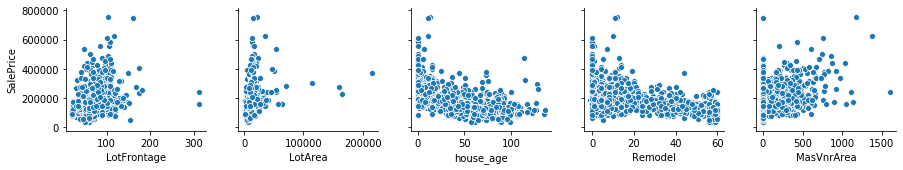

In [67]:
sns.pairplot(x_vars=['LotFrontage', 'LotArea', 'house_age', 'Remodel', 'MasVnrArea'],y_vars='SalePrice',data=numerical_data)

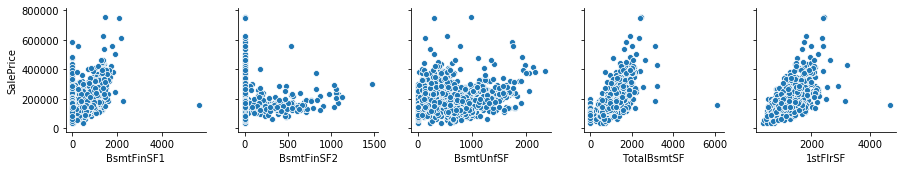

In [68]:
sns.pairplot(x_vars=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'],y_vars='SalePrice',data=numerical_data)

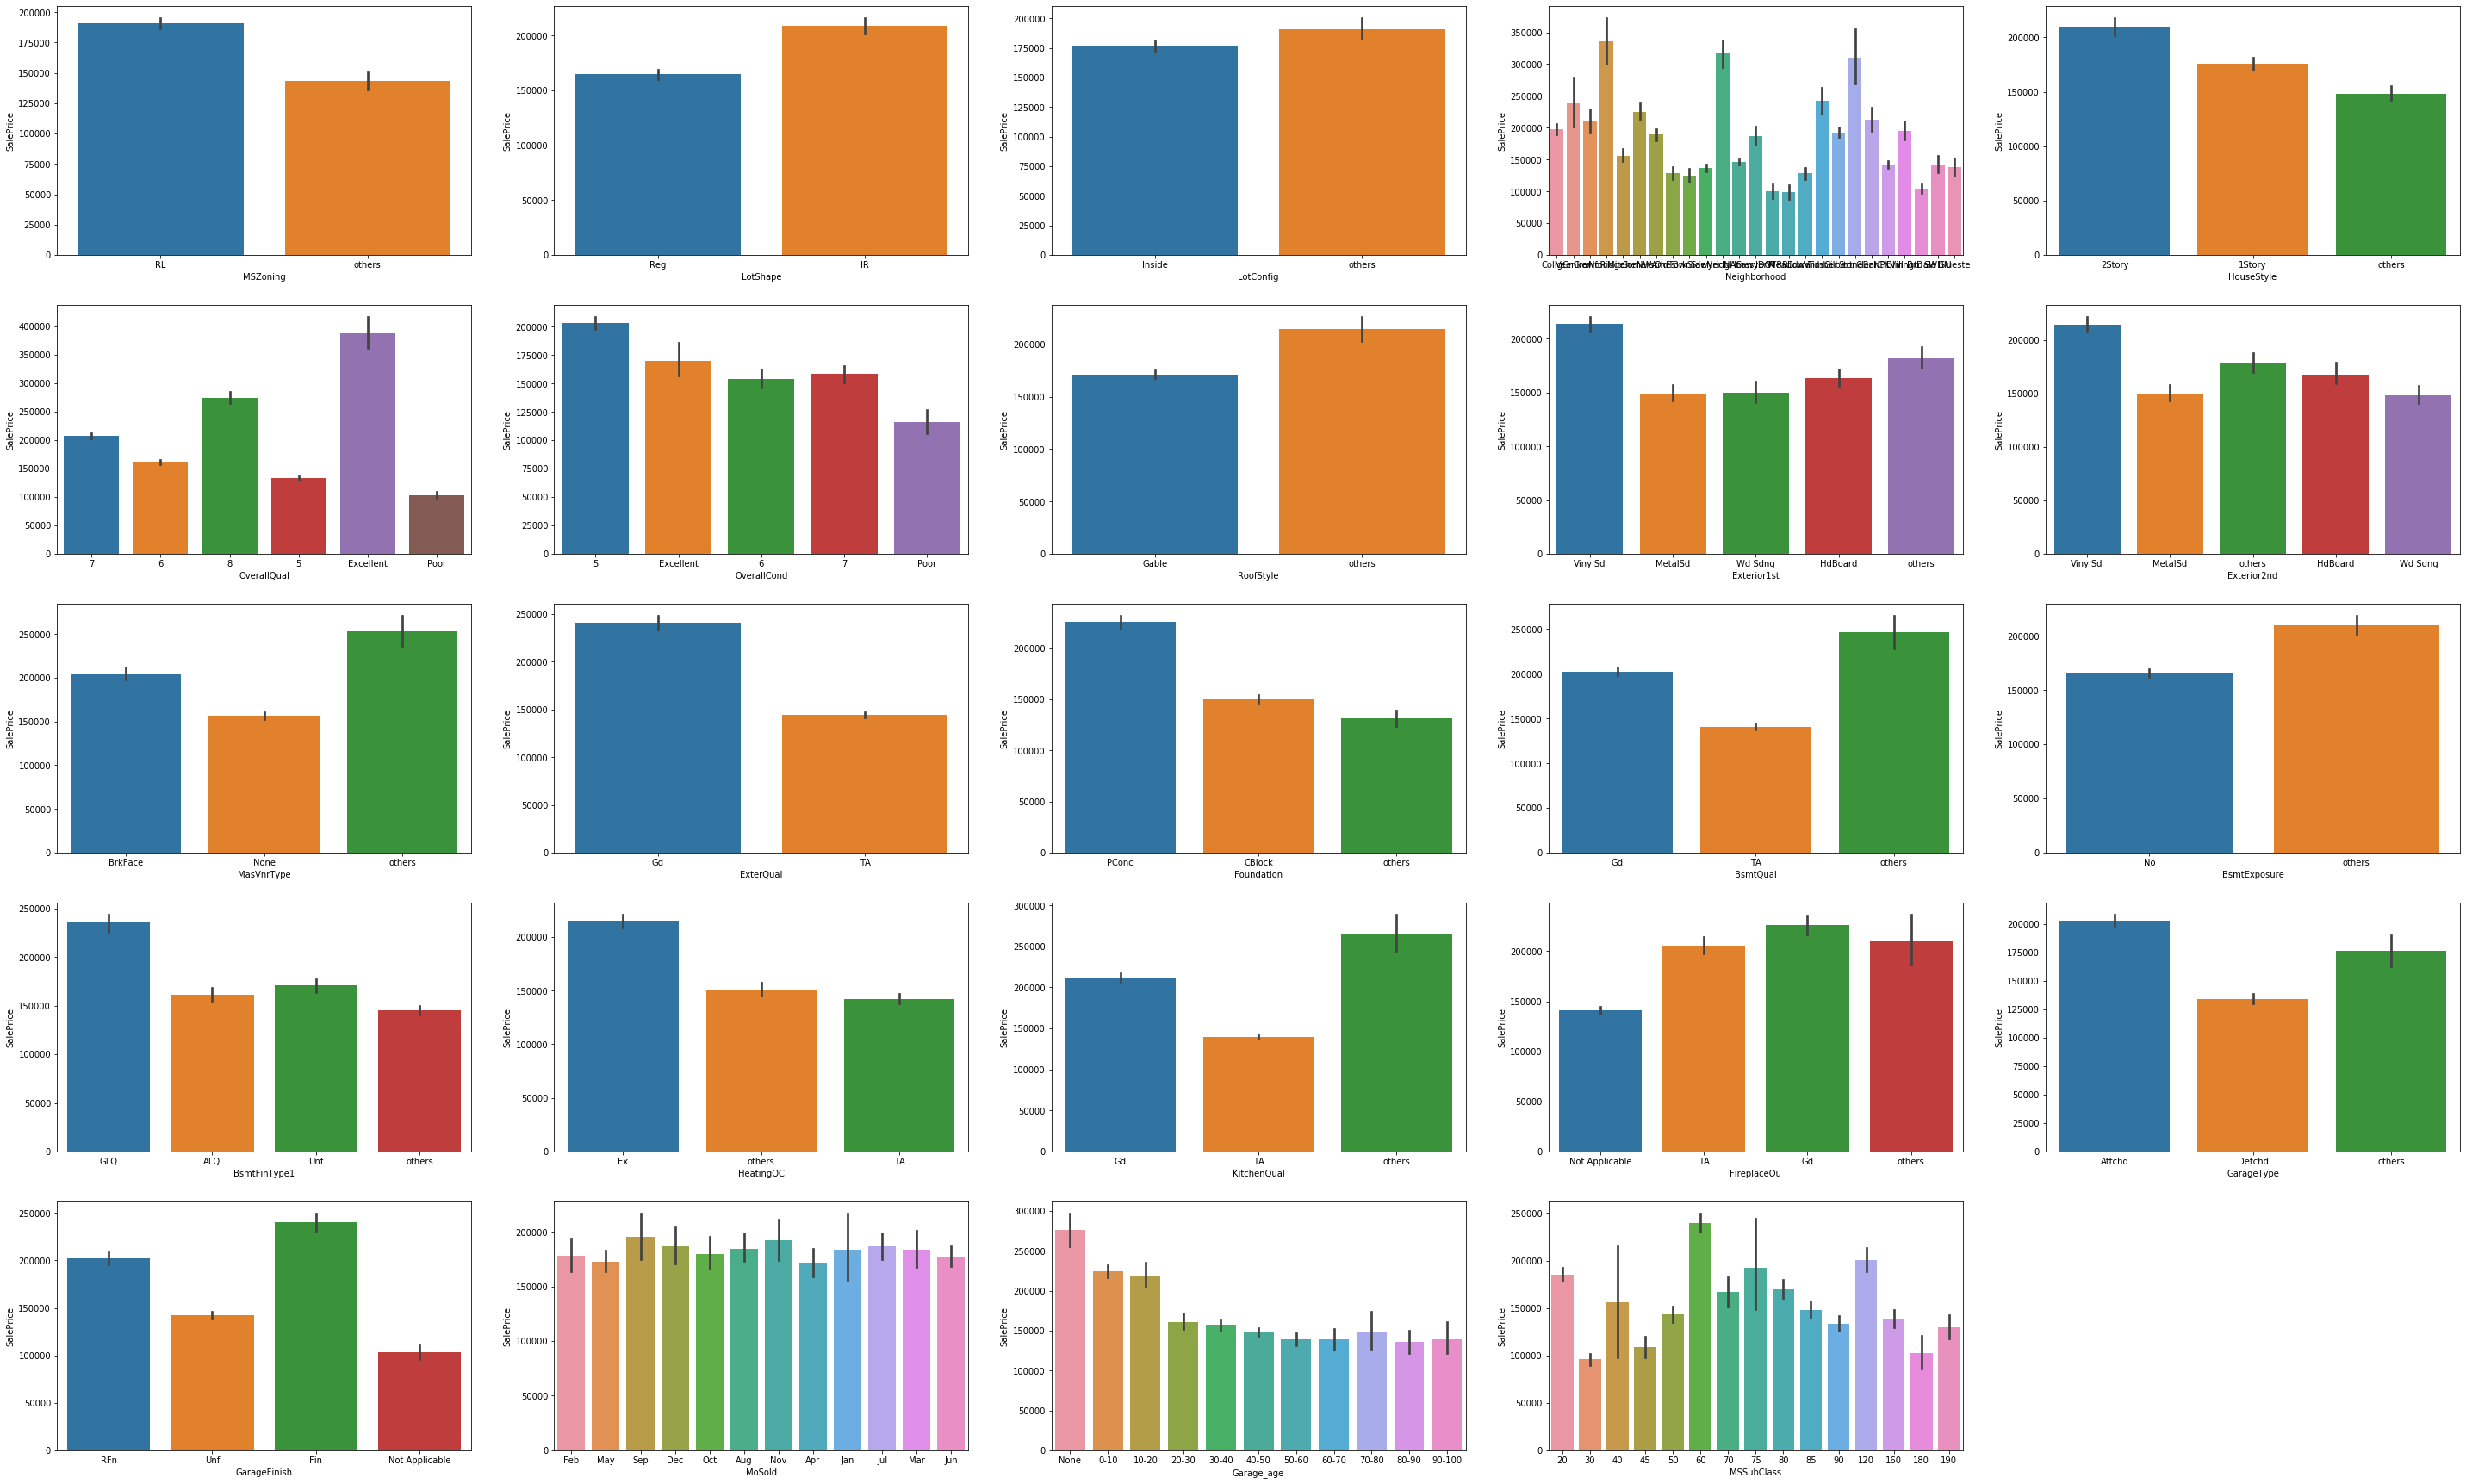

In [69]:
plt.figure(figsize=(50,50))
j=1
for i in categorical_data.columns:
    plt.subplot(8,5,j)
    sns.barplot(categorical_data[i],numerical_data['SalePrice'])
    j+=1

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Above graphs depict the distribution of various categorical columns

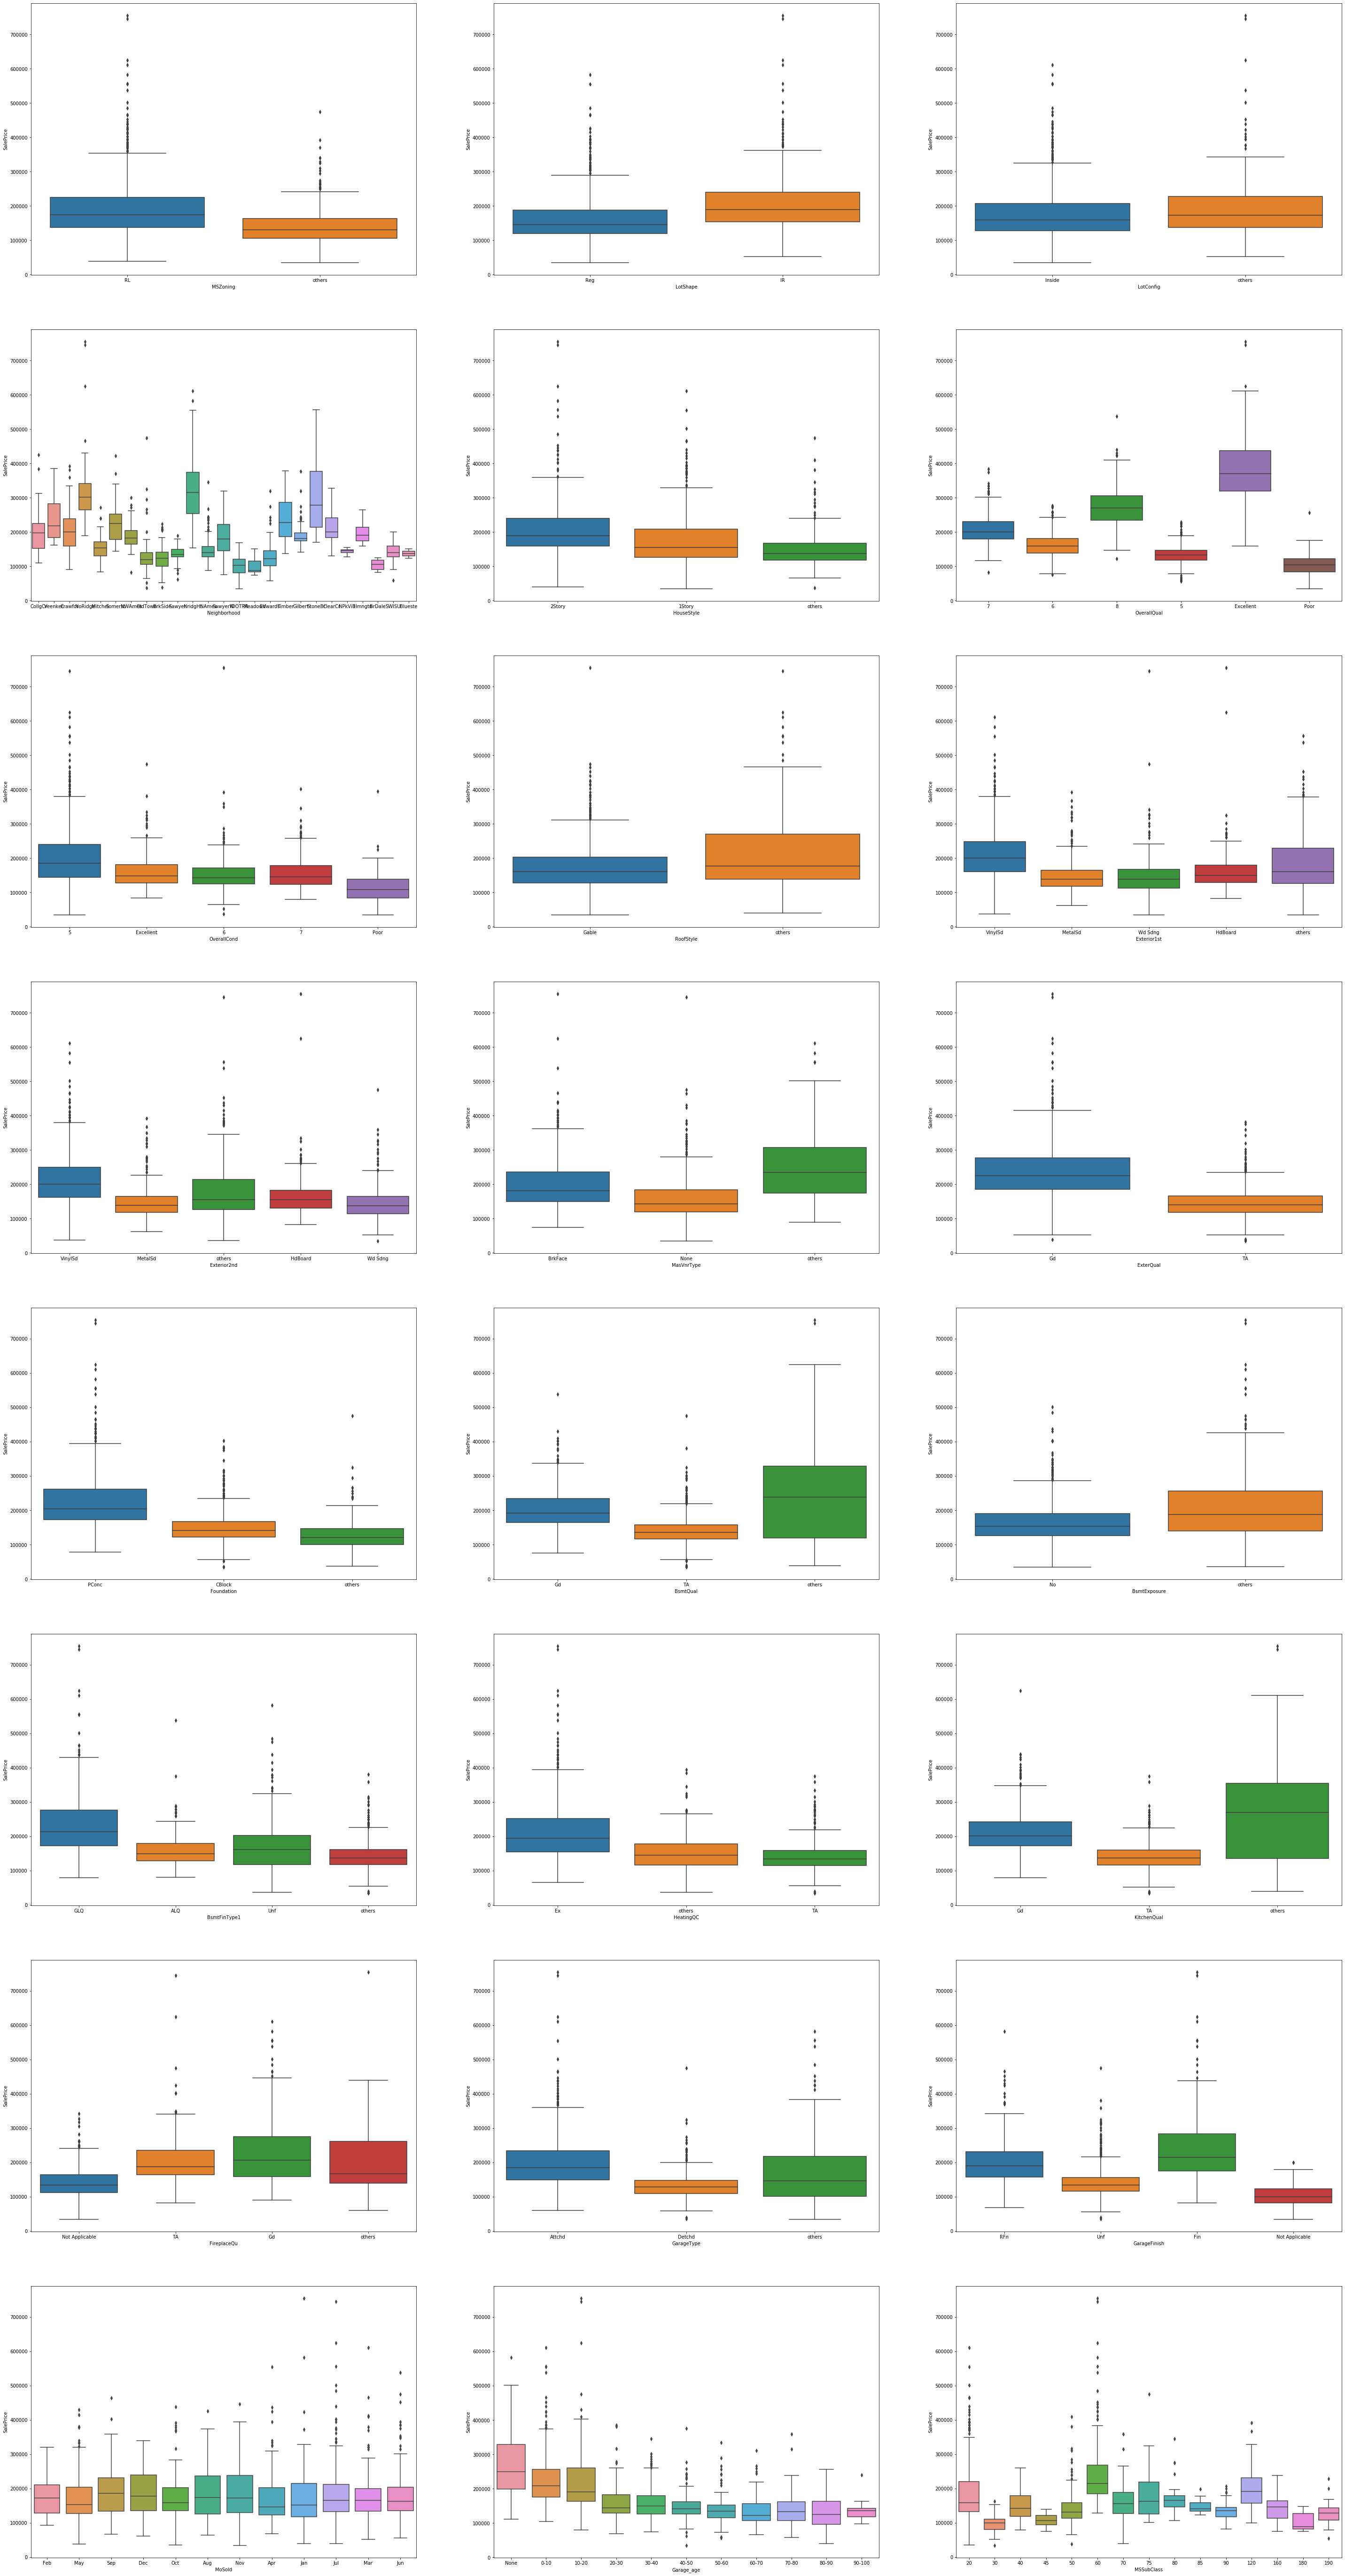

In [70]:
plt.figure(figsize=(50,100))
j=1
for i in categorical_data.columns:
    plt.subplot(8,3,j)
    sns.boxplot(x=i,y='SalePrice',data=data)
    j+=1

<p style="font-family: Arial; font-size:1.0em;color:blue;">  It is also important for the traget variable to be normally Distributed. <br>1. We can only take care of outliers if the data is normally distributed.<br>2. Hypothesis testing will fail if the data is not normally distributed,

<p style="font-family: Arial; font-size:1.0em;color:blue;">  So,  we use QQ plot to check how our data is aligned with the normal distribution,

Text(0.5, 1.0, 'Distribution of SalePrice')

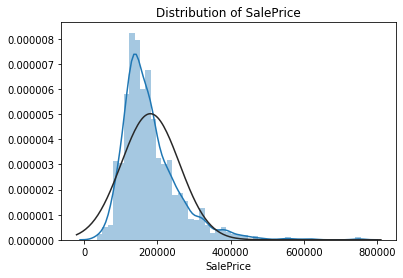

In [71]:
sns.distplot(numerical_data['SalePrice'],fit=norm)
plt.title('Distribution of SalePrice') # distribution of SalePrice column

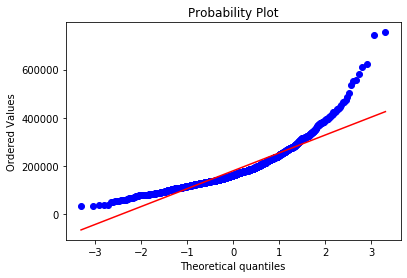

In [72]:
fig = plt.figure()
res = stats.probplot(numerical_data['SalePrice'], plot=plt)
plt.show() # QQ plot for SaleProce

<p style="font-family: Arial; font-size:1.0em;color:blue;">  The above figure depicts that the SaleProce data is not exactly normally distributed and ther is a lot skewness.  To overcome this problem, we apply the logarithm function to the column and then perform QQ plot on it.

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Also, we can observe that there is some skewness in the distribution of the SalePrice Variable. So, after performing the logarthmic function, the skewness is expected to diminish.

In [73]:
numerical_data['SalePrice'].skew() # skewness of SalePricce

1.8828757597682129

In [74]:
numerical_data['SalePrice']=np.log1p(numerical_data["SalePrice"]) # applying log to SalePrice column

Text(0.5, 1.0, 'Distribution of SalePrice')

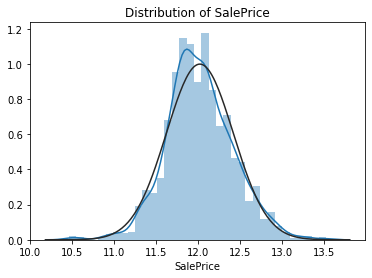

In [75]:
sns.distplot(numerical_data['SalePrice'],fit=norm)
plt.title('Distribution of SalePrice') # distribution of SalePrice column

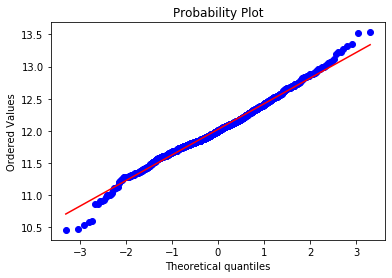

In [76]:
fig = plt.figure()
res = stats.probplot(numerical_data['SalePrice'], plot=plt)
plt.show() # QQ plot of SalePrice column

In [77]:
numerical_data['SalePrice'].skew() # skewness of SalePrice column

0.12134661989685333

<p style="font-family: Arial; font-size:1.0em;color:blue;">   We can observe that, after applying the logarthmic function, the SalePrrice column aligns more precisely with the normal distribution curve and the skewness has also diminished by good margin.

<p style="font-family: Arial; font-size:1.0em;color:blue;">  It's always preferrable if data in multiple columns are explained by only one column. So, we consider TotalSF which is the sum of TotalBsmtSF, 1stFlrSF and 2ndFlrSF.

In [78]:
numerical_data['TotalSF'] = numerical_data['TotalBsmtSF'] + numerical_data['1stFlrSF'] + numerical_data['2ndFlrSF']

In [79]:
numerical_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True) #dropping unwanted columns

<p style="font-family: Arial; font-size:1.0em;color:blue;">  It's not possible to feed the categorical data to the model. Since there are a lot of categorical features, we get the dummy variables for all the categorical data.

In [80]:
dummy_data=pd.get_dummies(data[categorical_data.columns]) # creating dummy variables for categorical data

In [81]:
dummy_data.head() # top 5 rows of dummy_data

,MSZoning_RL,MSZoning_others,LotShape_IR,LotShape_Reg,LotConfig_Inside,LotConfig_others,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [82]:
dummy_data.drop(['MSZoning_others', 'LotShape_IR', 'LotConfig_others', 'HouseStyle_others',
       'RoofStyle_others', 'Exterior1st_others', 'Exterior2nd_others', 'MasVnrType_others', 'ExterQual_Gd',
       'Foundation_others', 'BsmtQual_others', 'BsmtExposure_others', 'BsmtFinType1_others', 'HeatingQC_others',
       'KitchenQual_others', 'FireplaceQu_others', 'GarageType_others'],axis=1,inplace=True)
#dropping the extra unwanted columns from the dummy_data dataframe

In [83]:
#dropping the extra unwanted columns from the dummy_data dataframe
dummy_data.drop(['Neighborhood_Blmngtn','GarageFinish_Not Applicable','Garage_age_None', 'MSSubClass_20', 'OverallCond_Poor', 'OverallQual_Poor'],axis=1,inplace=True)

In [84]:
dummy_data.head() # top 5 rows of dummy_data

,MSZoning_RL,LotShape_Reg,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [85]:
df=pd.concat([numerical_data,dummy_data],axis=1) # concatnating the numerical data and categorical data

In [86]:
df.head() # top 5 rows of df

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,196.0,706,0,150,0,1710,1,0,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,0,1262,0,1,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,0,1786,1,0,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,0,1717,1,0,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,0,2198,1,0,...,1,0,0,0,0,0,0,0,0,0


In [87]:
df.shape # shape of df

(1460, 135)

In [88]:
df.columns #list of columns  in df

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190'],
      dtype='object', length=135)

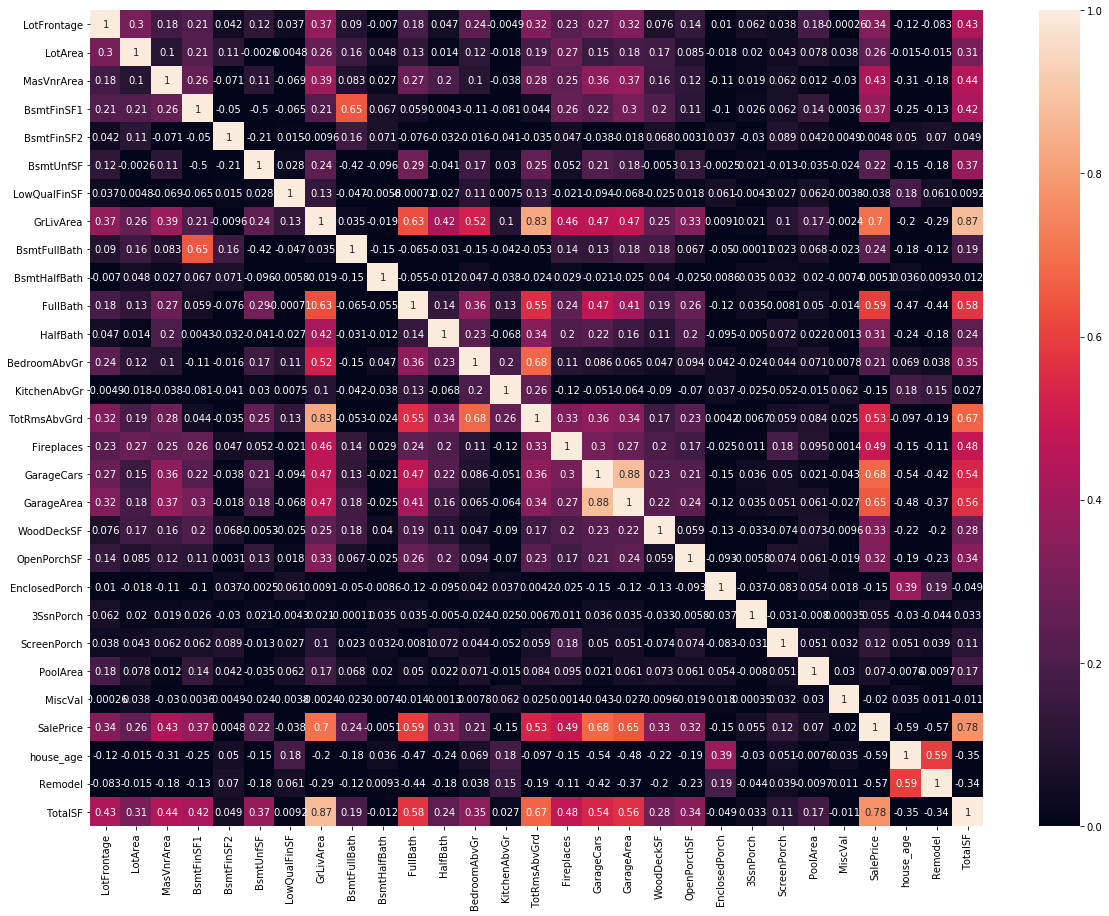

In [89]:
plt.figure(figsize=(20,15))
sns.heatmap(numerical_data.corr(),annot=True,vmin=0) # heatmap of correlation coefficients 

## OUTLIER ANALYSIS

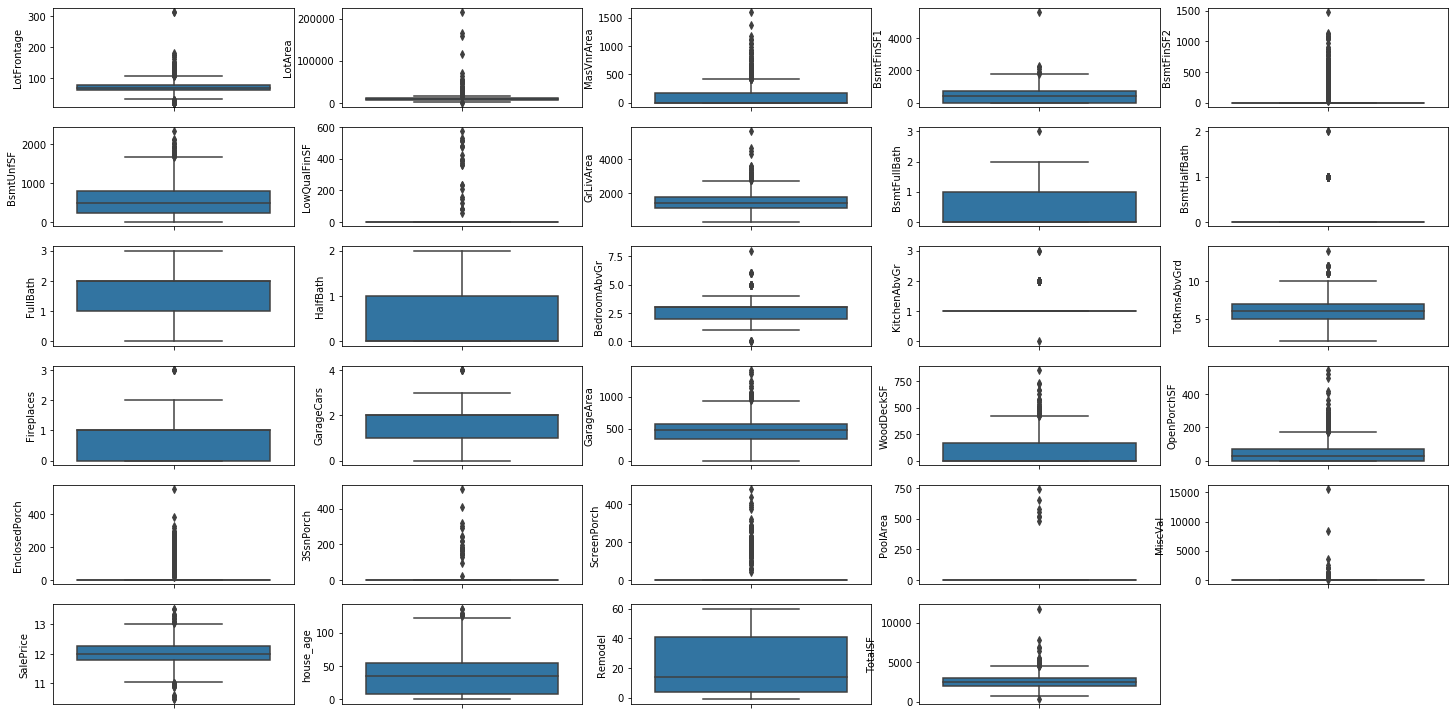

In [90]:
plt.figure(figsize=(25,15))
for i in enumerate(numerical_data.columns): 
    ax = plt.subplot(7, 5, i[0]+1)
    sns.boxplot(y=i[1], data=numerical_data)
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">  We can observe some outliers in the above graphs, but as the data in the dataframe is very limited, we don't eliminate the outliers

## TRAIN & TEST DATAFRAME SPLITTING

In [91]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=42) # Split the data into train and test

## DATA SCALING

<p style="font-family: Arial; font-size:1.0em;color:blue;">Scaling is an important step in the data pre-processing of the model. It helps us in analysing the data more easily. Since, the range of features vary widely, scaling is used to limit or set the values in a certain range. This helps us in analysing the data better because all the features has the values in certain range. <br>

In [92]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()

<p style="font-family: Arial; font-size:1.0em;color:blue;">  Here, Scaling is applied to only the numerical data in the dataset

In [93]:
# scaling the numerical columns in the train data
df_train[numerical_data.columns]=scaler.fit_transform(df_train[numerical_data.columns]) 

In [94]:
df_test[numerical_data.columns]=scaler.transform(df_test[numerical_data.columns]) #transforming the test data

In [95]:
df_train.head() # top 5 rows of scaled train dataset

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
1452,-1.523875,-0.624089,-0.143650,0.218347,-0.280483,-1.280843,-0.120373,-0.860896,1.111135,-0.247791,...,0,0,0,0,0,0,0,0,1,0
762,0.082045,-0.185863,-0.607545,-0.919206,-0.280483,0.362572,-0.120373,0.033726,-0.814958,-0.247791,...,1,0,0,0,0,0,0,0,0,0
932,0.602884,0.081575,1.143660,-0.971407,-0.280483,2.996077,-0.120373,0.707989,-0.814958,-0.247791,...,0,0,0,0,0,0,0,0,0,0
435,-1.176649,-0.006953,-0.607545,-0.134012,1.994578,-1.123686,-0.120373,0.248436,1.111135,-0.247791,...,1,0,0,0,0,0,0,0,0,0
629,0.516078,-0.152323,0.894316,0.385826,1.941670,-0.634254,-0.120373,-0.337307,1.111135,-0.247791,...,0,0,0,1,0,0,0,0,0,0


In [96]:
df_test.head() # top 5 rows of scaled test dataset

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
892,-0.004761,-0.205810,-0.607545,0.470653,-0.280483,-0.391782,-0.120373,-0.868430,-0.814958,3.899669,...,0,0,0,0,0,0,0,0,0,0
1105,1.210530,0.133297,1.491582,1.273247,-0.280483,-0.313204,-0.120373,2.058398,1.111135,-0.247791,...,1,0,0,0,0,0,0,0,0,0
413,-0.612407,-0.157618,-0.607545,-0.971407,-0.280483,0.982220,-0.120373,-0.943766,-0.814958,-0.247791,...,0,0,0,0,0,0,0,0,0,0
522,-0.872826,-0.507141,-0.607545,-0.103561,-0.280483,0.077444,-0.120373,0.254086,-0.814958,-0.247791,...,0,0,0,0,0,0,0,0,0,0
1036,0.819900,0.189962,-0.201637,1.251497,-0.280483,0.061728,-0.120373,0.171216,1.111135,-0.247791,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# assigning X_train and y_train
X_train=df_train.drop('SalePrice',axis=1)
y_train=df_train['SalePrice']

In [98]:
# assigning X_test and y_test
X_test=df_test.drop('SalePrice',axis=1)
y_test=df_test['SalePrice']

In [99]:
X_train.shape # shape of X_train

(1021, 134)

In [100]:
X_test.shape # shape of X_test

(439, 134)

In [101]:
y_train.shape # shape of y_train

(1021,)

In [102]:
y_test.shape # shape of y_test

(439,)

### FEATURE SELECTION USING RFE

<p style="font-family: Arial; font-size:1.0em;color:blue;">Fitting the Logistic regression model with x-train and y-train datasets using Recursive Feature Elimination. RFE is the process of recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable.

In [103]:
lr = LinearRegression()

# Run RFE with 30 variables as output
rfe = RFE(lr, 25)
rfe = rfe.fit(X_train, y_train)

In [104]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 49),
 ('LotArea', False, 48),
 ('MasVnrArea', False, 97),
 ('BsmtFinSF1', False, 43),
 ('BsmtFinSF2', False, 47),
 ('BsmtUnfSF', False, 46),
 ('LowQualFinSF', False, 44),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 14),
 ('BsmtHalfBath', False, 103),
 ('FullBath', False, 33),
 ('HalfBath', False, 30),
 ('BedroomAbvGr', False, 81),
 ('KitchenAbvGr', False, 34),
 ('TotRmsAbvGrd', False, 38),
 ('Fireplaces', False, 64),
 ('GarageCars', False, 12),
 ('GarageArea', False, 109),
 ('WoodDeckSF', False, 77),
 ('OpenPorchSF', False, 104),
 ('EnclosedPorch', False, 78),
 ('3SsnPorch', False, 79),
 ('ScreenPorch', False, 58),
 ('PoolArea', False, 101),
 ('MiscVal', False, 84),
 ('house_age', True, 1),
 ('Remodel', False, 39),
 ('TotalSF', False, 42),
 ('MSZoning_RL', False, 59),
 ('LotShape_Reg', False, 107),
 ('LotConfig_Inside', False, 83),
 ('Neighborhood_Blueste', False, 35),
 ('Neighborhood_BrDale', False, 50),
 ('Neighborhood_BrkSide', False, 106),
 ('Neighborh

In [105]:
# RFE selected columns/features
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['GrLivArea', 'house_age', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_Excellent', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_Excellent', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass_160',
       'MSSubClass_180'],
      dtype='object')

In [106]:
X_train_new=X_train[rfe_col].copy()

## VIF:
<p style="font-family: Arial; font-size:1.0em;color:blue;"> This refers to associations between predictor variables i.e. it refers to predictors that are correlated with other predictors. This is calculated using Variance Inflation Factor (VIF)<br> 
VIF=1/ 1−R2<br>
If the VIF is less than or equal to 1, then not correlated.<br>
If the VIF is between 1 and 5, then moderately correlated.<br>
If the VIF is greater than 5, then highly correlated.<br>

In [107]:
def check_vif(X):
    
    # Create a vif dataframe.
    vif = pd.DataFrame()
    
    # Add the features column.
    vif['Features'] = X.columns
    
    # Calculate the VIF.
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Round off VIF value to 2 digits.
    vif['VIF'] = round(vif['VIF'], 2)
    
    # Sort the VIF values in descending order.
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Print the VIF summary
    print(vif)

In [108]:
# Check the VIFs for the model.
check_vif(X_train_new)

                 Features   VIF
16          OverallCond_5  9.79
22       GarageFinish_Unf  6.55
21       GarageFinish_RFn  5.86
20       GarageFinish_Fin  5.40
13          OverallQual_7  5.21
12          OverallQual_6  4.82
14          OverallQual_8  4.16
11          OverallQual_5  4.01
17          OverallCond_6  3.56
18          OverallCond_7  3.13
15  OverallQual_Excellent  2.59
1               house_age  2.43
19  OverallCond_Excellent  2.08
0               GrLivArea  1.70
6    Neighborhood_NridgHt  1.60
7    Neighborhood_Somerst  1.41
23         MSSubClass_160  1.29
5    Neighborhood_NoRidge  1.27
8    Neighborhood_StoneBr  1.24
3    Neighborhood_Crawfor  1.16
9     Neighborhood_Timber  1.12
4    Neighborhood_NPkVill  1.11
2    Neighborhood_ClearCr  1.06
10   Neighborhood_Veenker  1.04
24         MSSubClass_180  1.04


In [109]:
X_train_new.drop('OverallCond_5',axis=1,inplace=True) #dropping high VIF value columns

In [110]:
# Check the VIFs for the model.
check_vif(X_train_new)

                 Features   VIF
21       GarageFinish_Unf  5.05
20       GarageFinish_RFn  4.65
13          OverallQual_7  4.37
19       GarageFinish_Fin  4.33
12          OverallQual_6  4.03
14          OverallQual_8  3.62
11          OverallQual_5  3.46
1               house_age  2.42
15  OverallQual_Excellent  2.38
0               GrLivArea  1.63
6    Neighborhood_NridgHt  1.60
17          OverallCond_7  1.59
16          OverallCond_6  1.56
7    Neighborhood_Somerst  1.41
18  OverallCond_Excellent  1.35
22         MSSubClass_160  1.29
5    Neighborhood_NoRidge  1.27
8    Neighborhood_StoneBr  1.24
3    Neighborhood_Crawfor  1.16
9     Neighborhood_Timber  1.12
4    Neighborhood_NPkVill  1.11
2    Neighborhood_ClearCr  1.05
10   Neighborhood_Veenker  1.04
23         MSSubClass_180  1.04


In [111]:
X_train_new.drop('GarageFinish_Unf',axis=1,inplace=True) #dropping high VIF value columns

In [112]:
# Check the VIFs for the model.
check_vif(X_train_new)

                 Features   VIF
19       GarageFinish_Fin  2.51
20       GarageFinish_RFn  2.43
14          OverallQual_8  2.38
1               house_age  2.28
13          OverallQual_7  2.21
12          OverallQual_6  2.02
15  OverallQual_Excellent  1.90
11          OverallQual_5  1.70
6    Neighborhood_NridgHt  1.60
17          OverallCond_7  1.59
0               GrLivArea  1.56
16          OverallCond_6  1.54
7    Neighborhood_Somerst  1.41
18  OverallCond_Excellent  1.35
21         MSSubClass_160  1.28
5    Neighborhood_NoRidge  1.26
8    Neighborhood_StoneBr  1.24
3    Neighborhood_Crawfor  1.16
9     Neighborhood_Timber  1.12
4    Neighborhood_NPkVill  1.11
2    Neighborhood_ClearCr  1.05
10   Neighborhood_Veenker  1.04
22         MSSubClass_180  1.03


<p style="font-family: Arial; font-size:1.0em;color:blue;"> Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

## RIDGE MODEL

In [113]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]} # hyperparameter

In [114]:
ridge = Ridge() # applying Ridge

folds = 5

model_ridge= GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_ridge.fit(X_train_new,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [115]:
cv_results = pd.DataFrame(model_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head() 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004498,0.002792,0.001367,0.001890,0.0001,{'alpha': 0.0001},-0.279123,-0.346909,-0.316050,-0.303889,...,-0.299169,0.032879,16,-0.288190,-0.268758,-0.282946,-0.280983,-0.295792,-0.283334,0.008910
1,0.004289,0.000767,0.000397,0.000486,0.001,{'alpha': 0.001},-0.279122,-0.346910,-0.316046,-0.303885,...,-0.299167,0.032880,15,-0.288190,-0.268758,-0.282945,-0.280982,-0.295791,-0.283333,0.008910
2,0.004337,0.003414,0.000616,0.001231,0.01,{'alpha': 0.01},-0.279114,-0.346928,-0.316011,-0.303849,...,-0.299149,0.032890,14,-0.288184,-0.268754,-0.282938,-0.280969,-0.295778,-0.283325,0.008907
3,0.004449,0.001923,0.000000,0.000000,0.05,{'alpha': 0.05},-0.279077,-0.347018,-0.315859,-0.303688,...,-0.299072,0.032937,13,-0.288159,-0.268739,-0.282903,-0.280913,-0.295723,-0.283288,0.008897
4,0.000923,0.001367,0.002243,0.002905,0.1,{'alpha': 0.1},-0.279031,-0.347129,-0.315674,-0.303490,...,-0.298979,0.032995,12,-0.288132,-0.268725,-0.282860,-0.280856,-0.295661,-0.283247,0.008885


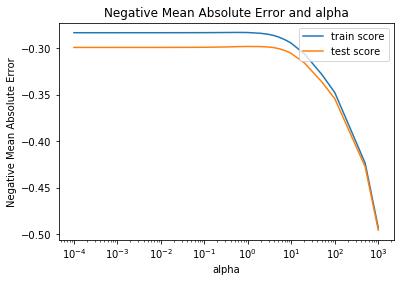

In [116]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [117]:
model_ridge.best_params_ # best  hyperparameter

{'alpha': 1.0}

In [118]:
ridge=Ridge(alpha=1.00)
ridge_model=ridge.fit(X_train_new,y_train) # fitting model with best parameter

In [119]:
y_pred_ridge=ridge_model.predict(X_test[X_train_new.columns]) #predicting model on X_test

In [120]:
r2_score(y_true=y_test,y_pred=y_pred_ridge) #r2 score on test data

0.8610453571337167

In [121]:
y_pred_train = ridge_model.predict(X_train_new)


print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_ridge)))


RMSE train: 0.4080610268456357
R2 score Train: 0.8334861983696854


RMSE test: 0.38934756990095887
R2 score test: 0.8610453571337167


In [122]:
ridge_model.coef_ #ridge model coefficients

array([ 0.38501003, -0.35520574,  0.5769518 ,  0.47986285,  0.22476926,
        0.31683786,  0.41140986,  0.27507877,  0.4948532 ,  0.28383853,
        0.3984706 ,  0.3283139 ,  0.46952063,  0.67573116,  0.93160045,
        1.28753165,  0.24151998,  0.36051093,  0.42132714,  0.15904674,
        0.17881646, -0.61848009, -0.36455321])

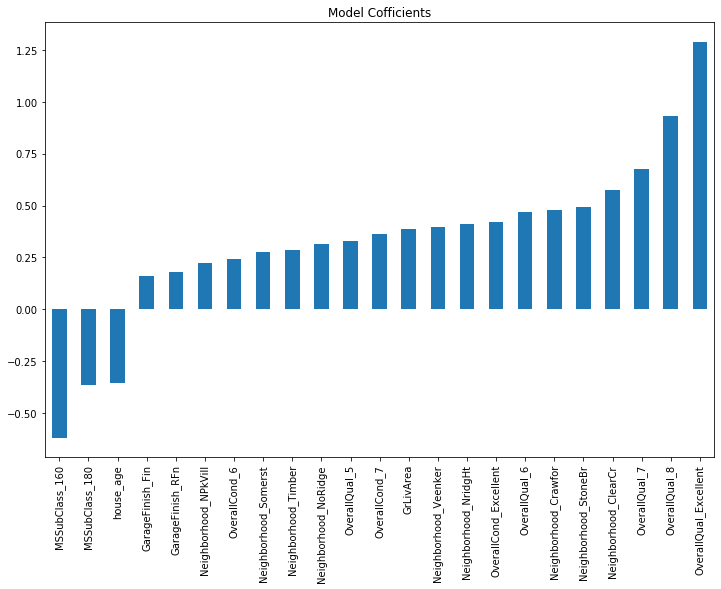

In [123]:
plt.figure(figsize=(12,8))
pred = X_train_new.columns
coef = pd.Series(ridge_model.coef_,pred).sort_values()
coef.plot(kind = 'bar', title = "Model Cofficients")

In [124]:
ridge_model_parameter = list(ridge_model.coef_)
ridge_model_parameter.insert(0,ridge_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,ridge_model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
16,OverallCond_6,1.287532
15,OverallQual_Excellent,0.931600
14,OverallQual_8,0.675731
3,Neighborhood_Crawfor,0.576952
9,Neighborhood_Timber,0.494853
4,Neighborhood_NPkVill,0.479863
13,OverallQual_7,0.469521
19,GarageFinish_Fin,0.421327
7,Neighborhood_Somerst,0.411410
11,OverallQual_5,0.398471


<p style="font-family: Arial; font-size:1.0em;color:blue;"> Above are the top 10 parameters that explain the best Ridge model

Text(0, 0.5, 'Housing Price Predictions')

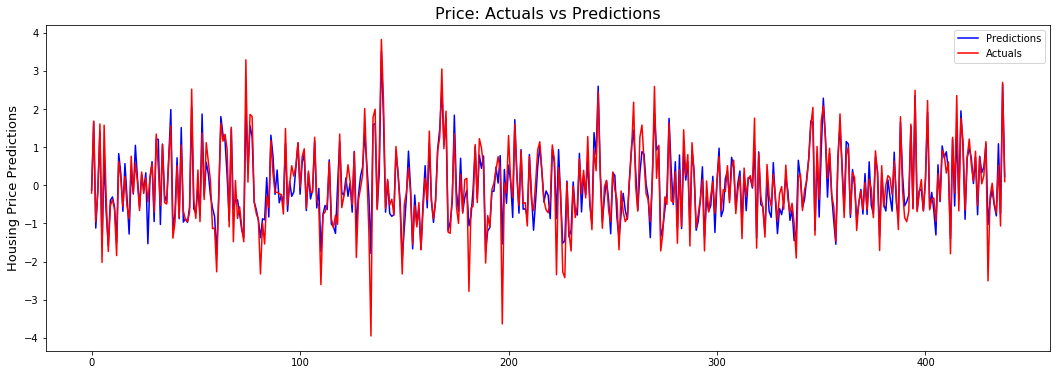

In [125]:
fig, ax=plt.subplots(figsize=(18,6))
sns.lineplot(x=range(len(y_pred_ridge)),y=y_pred_ridge,label='Predictions',color='blue',ax=ax)
sns.lineplot(x=range(len(y_pred_ridge)),y=y_test,label='Actuals',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
ax.set_ylabel('Housing Price Predictions',fontsize=13) # Actual vs Predicted

## LASSO MODEL

In [126]:
lasso = Lasso() # applying Lasso

# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [127]:
cv_results = pd.DataFrame(model_lasso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005228,0.002712,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.279058,-0.347197,-0.315135,-0.303315,...,-0.298843,0.032972,2,-0.288026,-0.268722,-0.282771,-0.280745,-0.295607,-0.283174,0.008866
1,0.004356,0.001255,0.001884,0.000809,0.001,{'alpha': 0.001},-0.278490,-0.351799,-0.312764,-0.298612,...,-0.297827,0.034735,1,-0.287692,-0.269855,-0.282710,-0.281487,-0.295402,-0.283429,0.008367
2,0.002399,0.001353,0.001508,0.001573,0.01,{'alpha': 0.01},-0.300671,-0.401691,-0.347170,-0.316719,...,-0.327161,0.044862,3,-0.320648,-0.308705,-0.317079,-0.317668,-0.328376,-0.318495,0.006337
3,0.006270,0.007679,0.000000,0.000000,0.05,{'alpha': 0.05},-0.366172,-0.473977,-0.412566,-0.405684,...,-0.403757,0.040715,4,-0.409915,-0.376630,-0.400833,-0.398444,-0.410277,-0.399220,0.012249
4,0.003335,0.006671,0.003385,0.006283,0.1,{'alpha': 0.1},-0.379733,-0.468697,-0.430604,-0.409275,...,-0.411529,0.035816,5,-0.417978,-0.381711,-0.411287,-0.406805,-0.417267,-0.407010,0.013296


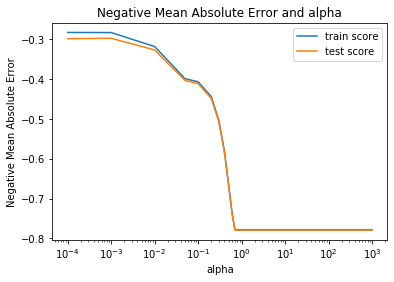

In [128]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [129]:
model_lasso.best_params_ # best hyperparameter

{'alpha': 0.001}

In [130]:
lasso=Lasso(alpha=0.01)
lasso_model=lasso.fit(X_train_new,y_train) #fit model on alpha = 0.01

In [131]:
y_pred_lasso=lasso_model.predict(X_test[X_train_new.columns])
r2_score(y_true=y_test,y_pred=y_pred_lasso) # r2 on test data

0.8206659650043407

In [132]:
lasso_model.coef_ # coeffiecients

array([ 0.47865661, -0.40236011,  0.        ,  0.25526644,  0.        ,
        0.        ,  0.10368945,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.04802468,  0.17929436,  0.49640229,
        0.6417955 ,  0.10364039,  0.24337534,  0.26763505,  0.16277731,
        0.1638451 , -0.30289559, -0.        ])

In [133]:
y_pred_train = ridge_model.predict(X_train_new)
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_lasso)))

RMSE train: 0.4080610268456357
R2 score Train: 0.8334861983696854


RMSE test: 0.4423156413188963
R2 score test: 0.8206659650043407


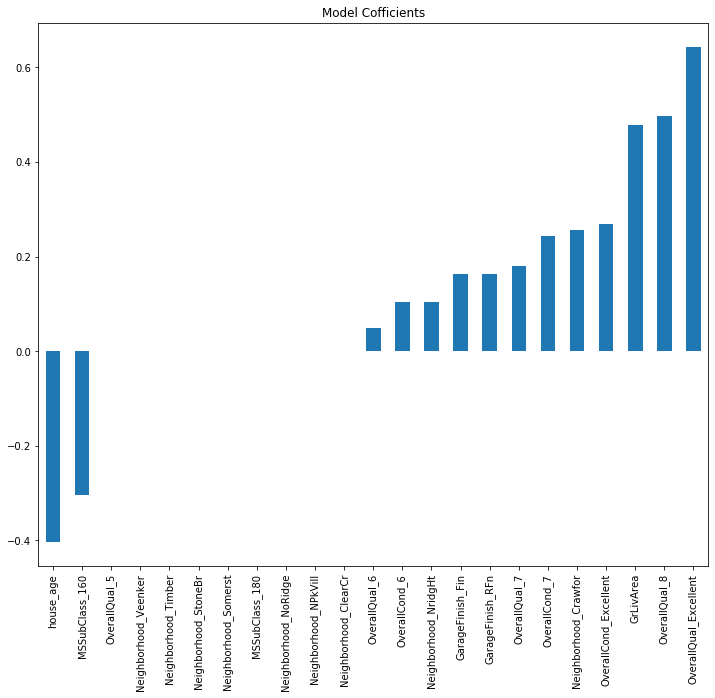

In [134]:
plt.figure(figsize=(12,10))
pred = X_train_new.columns
coef = pd.Series(lasso_model.coef_,pred).sort_values()
coef.plot(kind = 'bar', title = "Model Cofficients")

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Here, when alpha is 0.01, lasso makes the coefficients as 0 which results in feature selection. But the r2 score on test data is high when the aplha value is 0.001. So, we predict the final model using the best parameter.

In [135]:
lasso_model_parameter = list(lasso_model.coef_)
lasso_model_parameter.insert(0,lasso_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
16,OverallCond_6,0.641796
15,OverallQual_Excellent,0.496402
1,house_age,0.478657
19,GarageFinish_Fin,0.267635
4,Neighborhood_NPkVill,0.255266
18,OverallCond_Excellent,0.243375
14,OverallQual_8,0.179294
21,MSSubClass_160,0.163845
20,GarageFinish_RFn,0.162777
7,Neighborhood_Somerst,0.103689


In [136]:
lasso=Lasso(alpha=0.001) #fitting model on best parameter
lasso_model=lasso.fit(X_train_new,y_train)

In [137]:
y_pred_lasso=lasso_model.predict(X_test[X_train_new.columns])
r2_score(y_true=y_test,y_pred=y_pred_lasso)

0.8607350969849775

In [138]:
lasso_model.coef_ # coefficients

array([ 0.38626133, -0.3554629 ,  0.54972244,  0.45961284,  0.06491746,
        0.26057042,  0.36088034,  0.23158199,  0.43050233,  0.23774674,
        0.30857685,  0.31866749,  0.46509866,  0.67537674,  0.95723696,
        1.32728544,  0.23569585,  0.3512981 ,  0.4059257 ,  0.15108171,
        0.17540667, -0.58376007, -0.27534517])

In [139]:
y_pred_train = ridge_model.predict(X_train_new)
print("RMSE train: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("R2 score Train: {}".format(r2_score(y_train,y_pred_train)))
print(end = "\n\n")
print("RMSE test: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print("R2 score test: {}".format(r2_score(y_test,y_pred_lasso)))

RMSE train: 0.4080610268456357
R2 score Train: 0.8334861983696854


RMSE test: 0.38978199827675514
R2 score test: 0.8607350969849775


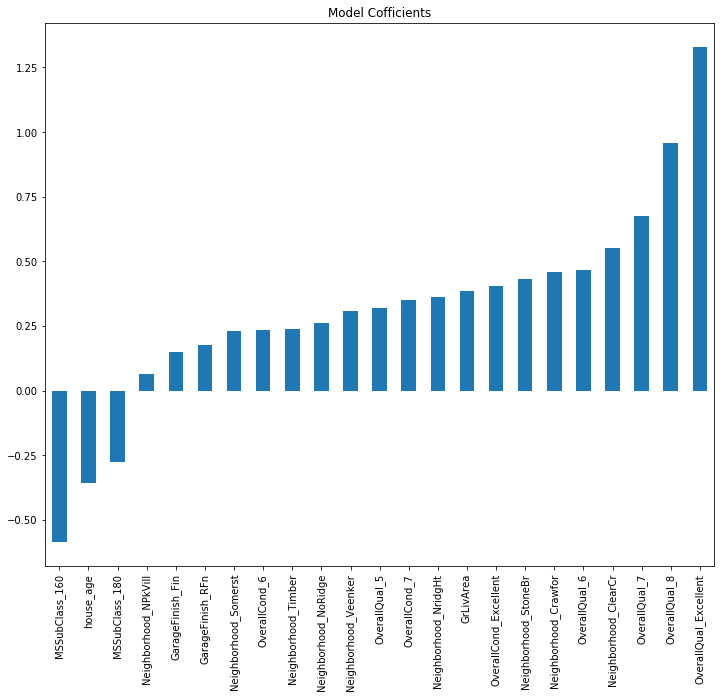

In [140]:
plt.figure(figsize=(12,10))
pred = X_train_new.columns
coef = pd.Series(lasso_model.coef_,pred).sort_values()
coef.plot(kind = 'bar', title = "Model Cofficients")

In [141]:
lasso_model_parameter = list(lasso_model.coef_)
lasso_model_parameter.insert(0,lasso_model.intercept_)
cols = X_train_new.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_parameter)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
16,OverallCond_6,1.327285
15,OverallQual_Excellent,0.957237
14,OverallQual_8,0.675377
3,Neighborhood_Crawfor,0.549722
13,OverallQual_7,0.465099
4,Neighborhood_NPkVill,0.459613
9,Neighborhood_Timber,0.430502
19,GarageFinish_Fin,0.405926
1,house_age,0.386261
7,Neighborhood_Somerst,0.360880


<p style="font-family: Arial; font-size:1.0em;color:blue;"> Above are the top 10 parameters that explain the best lasso model

Text(0, 0.5, 'Housing Price Predictions')

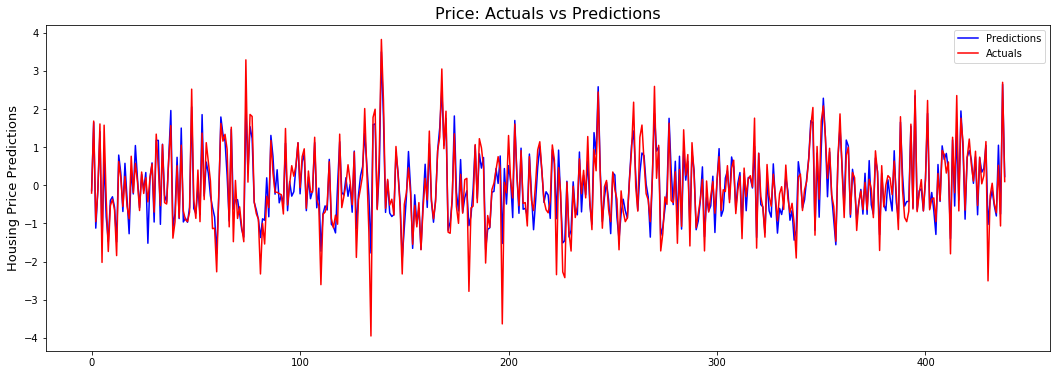

In [142]:
fig, ax=plt.subplots(figsize=(18,6))
sns.lineplot(x=range(len(y_pred_ridge)),y=y_pred_lasso,label='Predictions',color='blue',ax=ax)
sns.lineplot(x=range(len(y_pred_ridge)),y=y_test,label='Actuals',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
ax.set_ylabel('Housing Price Predictions',fontsize=13)

## SUMMARY

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Finally, we prefer the ridge model with the best hyperparameter  alpha = 1. The r2 score on the test data is 0.861 which depicts that the model explains 86.1 percent variance. WE preferred ridge over lasso because, for the best value of alpha, lasso model is not making any of the coefficients zero, which doesnot result in feature selection. As the final lasso model doesn't make any feature selection and it's computation cost is high, we prefer Ridge Regression over Lasso. 

<p style="font-family: Arial; font-size:1.0em;color:blue;"> The parameters that best explain the model for both Lasso and Ridge models are stated below:

<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
1. OverallCond_6<br>
2. OverallQual_Excellent<br>
3. OverallQual_8<br>
4. Neighborhood_Crawfor<br>
5. OverallQual_7<br>
6. Neighborhood_NPkVill<br>
7. Neighborhood_Timber<br>